<a href="https://colab.research.google.com/github/abhich2507/Numerical_Python/blob/main/Assn3_P452_1911007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#1

import numpy as np
def mag(xs):
    return np.sqrt(np.sum(xs*xs))
def qrdec(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j):
            R[i,j] = Q[:,i]@A[:,j]
            Ap[:,j] -= R[i,j]*Q[:,i]
        R[j,j] = mag(Ap[:,j])
        Q[:,j] = Ap[:,j]/R[j,j]
    return Q, R
A=np.array([[4.0,2.0/3.0,-4.0/3.0,4.0/3.0],[2.0/3.0,4.0,0,0],[-4.0/3.0,0,6,2],[4.0/3.0,0.0,2.0,6.0]],dtype=complex)
'''
Q,R=qrdec(A)
print('Q=',Q)
print('R=',R)
'''
for k in range(1,20):
    Q,R=qrdec(A)
    A=R@Q
    m=[]
    for i in range(1,np.shape(A)[0]):
        for j in range(i+1):
            m.append(abs(A[i][j]))
    f=sum(m)
    if f<=0.00001:
        break
eigenvalues=np.diagonal(A)
print('A=',A)
print('Q=',Q)
print('eigenvalues=',eigenvalues)

A= [[ 6.00000000e+00  3.31152776e-15 -5.24604773e-14  3.44156801e-09]
 [ 3.28225807e-15  4.00000000e+00  1.21079839e-11 -1.90734863e-06]
 [-5.30689896e-14  1.21084736e-11  8.00000000e+00  3.27398426e-11]
 [ 3.44156639e-09 -1.90734863e-06  3.27418150e-11  2.00000000e+00]]
Q= [[ 1.00000000e+00 -1.64109789e-15  6.63363074e-15 -1.72078319e-09]
 [ 3.28216462e-15  1.00000000e+00 -1.51356311e-12  9.53674316e-07]
 [-6.63365891e-15  1.51357872e-12  1.00000000e+00 -1.63709061e-11]
 [ 1.72078319e-09 -9.53674316e-07  1.63709075e-11  1.00000000e+00]]
eigenvalues= [6. 4. 8. 2.]


<ipython-input-22-8d2af50ea353>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  R[j,j] = mag(Ap[:,j])
<ipython-input-22-8d2af50ea353>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[:,j] = Ap[:,j]/R[j,j]
<ipython-input-22-8d2af50ea353>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  R[i,j] = Q[:,i]@A[:,j]


#1b

In [23]:
import numpy as np

# Define the matrix
A = np.array([[4.0, 2.0/3.0, -4.0/3.0, 4.0/3.0],
              [2.0/3.0, 4.0, 0, 0],
              [-4.0/3.0, 0, 6, 2],
              [4.0/3.0, 0.0, 2.0, 6.0]], dtype=complex)

# Choose an initial guess for the eigenvector
v_initial = np.array([1, 1, 1, 1])

# Define a function to calculate the relative error
def relative_error(new_val, old_val):
    return abs((new_val - old_val) / new_val) * 100

# Initialize variables
old_eigenvalue = 0.0
tolerance = 0.0001

# Iterative method to find the largest eigenvalue and its corresponding eigenvector
while True:
    v_updated = np.dot(A, v_initial)
    eigenvalue = np.linalg.norm(v_updated)
    error = relative_error(eigenvalue, old_eigenvalue)
    v_updated = v_updated / eigenvalue

    # Check if the error is within tolerance
    if error < tolerance:
        break

    old_eigenvalue = eigenvalue
    v_initial = v_updated

# Print the results
print('Largest eigenvalue =', eigenvalue)
print('Eigenvector =', v_updated)


Largest eigenvalue = 7.999992178241464
Eigenvector = [1.12119132e-03+0.j 3.74030152e-04+0.j 7.06358506e-01+0.j
 7.07853278e-01+0.j]


#2A

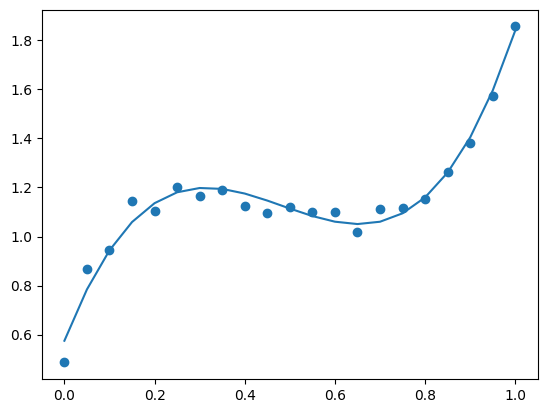

In [24]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.00,1.05,0.05)
y=np.array([0.486,0.866,0.944,1.144,1.103,1.202,1.166,1.191,1.124,1.095,1.122,1.102,1.099,1.017,1.111,1.117,1.152,1.265,1.380,1.575,1.857])
x2=x**2
x3=x**3
x4=x**4
x5=x**5
x6=x**6
xy=x*y
x2y=x2*y
x3y=x3*y
sumx=np.sum(x)
sumy=np.sum(y)
sumx2=np.sum(x2)
sumx3=np.sum(x3)
sumx4=np.sum(x4)
sumx5=np.sum(x5)
sumx6=np.sum(x6)
sumxy=np.sum(xy)
sumx2y=np.sum(x2y)
sumx3y=np.sum(x3y)
A=np.array([[len(x),sumx,sumx2,sumx3],[sumx,sumx2,sumx3,sumx4],[sumx2,sumx3,sumx4,sumx5],[sumx3,sumx4,sumx5,sumx6]])
B=np.array([sumy,sumxy,sumx2y,sumx3y])
X=np.linalg.solve(A, B)
def f(x,a,b,c,d):
    return a + b*x + c*x**2 + d*x**3
plt.scatter(x,y)
plt.plot(x,f(x,X[0],X[1],X[2],X[3]))


#2B

In [25]:
#2b
data = np.genfromtxt("assign3fit.txt")
x, y = data[:, 0], data[:, 1]
x, y

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124,
        1.095, 1.122, 1.102, 1.099, 1.017, 1.111, 1.117, 1.152, 1.265,
        1.38 , 1.575, 1.857]))

In [26]:
yerr = np.tile([0.001], x.shape[0])
yerr

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001])

In [27]:


import numpy as np
from matplotlib import pyplot as plt

from assn_3_utils import mlcgList, gauss_seidel, gauss_elim

def poly(n, x):
    return x ** n

def cheby(n, x):
    chebyshev = {
        0: 1,
        1: x,
        2: 2 * x ** 2 - 1,
        3: 4 * x ** 3 - 3 * x,
    }

    return chebyshev[n]

def polyfit(x, y, yerr, n=2, basis="poly"):
    """
    Polynomial Least-Squares Fitting

    """
    bases = {
        "poly": poly,
        "cheby": cheby
    }

    basis = bases[basis]

    N = n + 1
    A = np.empty((N, N))
    b = np.empty(N)

    for i in range(N):
        for j in range(N):
            A[i, j] = np.sum(basis(i, x) * basis(j, x) / yerr ** 2)
            b[j] = np.sum((basis(j, x) * y) / yerr ** 2)

    # Using Gauss-Elimination to calculate x
    return gauss_elim(A, b)

# Cubic LSq fit

In [28]:

_, (a0, a1, a2, a3), _ = polyfit(x, y, yerr, n=3)
polytuple = (a0, a1, a2, a3)
polytuple


(0.5746586674194756,
 4.7258614421437075,
 -11.128217777647695,
 7.668677622912345)

In [29]:
# Cheby LSq fit
_, (a0, a1, a2, a3), _ = polyfit(x, y, yerr, n=3, basis="cheby")
chebytuple = (a0, a1, a2, a3)
chebytuple

(-4.9894502214032475,
 10.477369659326074,
 -5.564108888822789,
 1.917169405727739)

In [30]:
def func(x, a0, a1, a2, a3, basis="poly"):
    if basis == "cheby":
        ch = cheby
        return a0 * ch(0, x) + a1 * ch(1, x) + a2 * ch(2, x) + a3 * ch(3, x)

    return a0 + a1 * x + a2 * x ** 2 + a3 * x ** 3


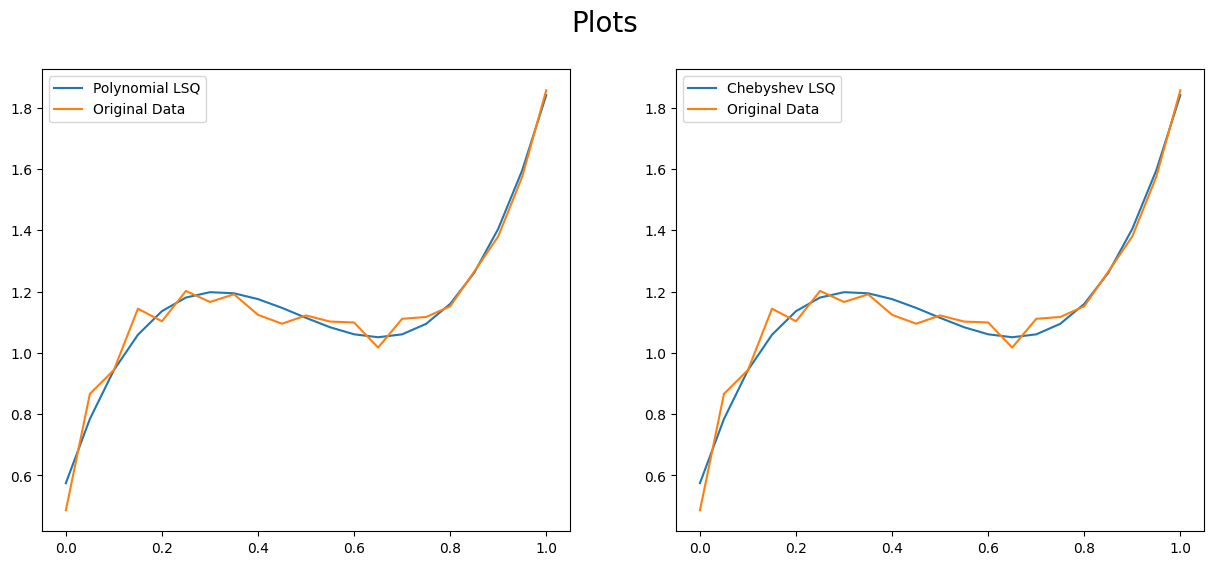

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func(x, *polytuple), label="Polynomial LSQ")
axs[0].plot(x, y, label="Original Data")
axs[1].plot(x, func(x, *chebytuple, basis="cheby"), label="Chebyshev LSQ")
axs[1].plot(x, y, label="Original Data")

axs[0].legend()
axs[1].legend()
plt.show()


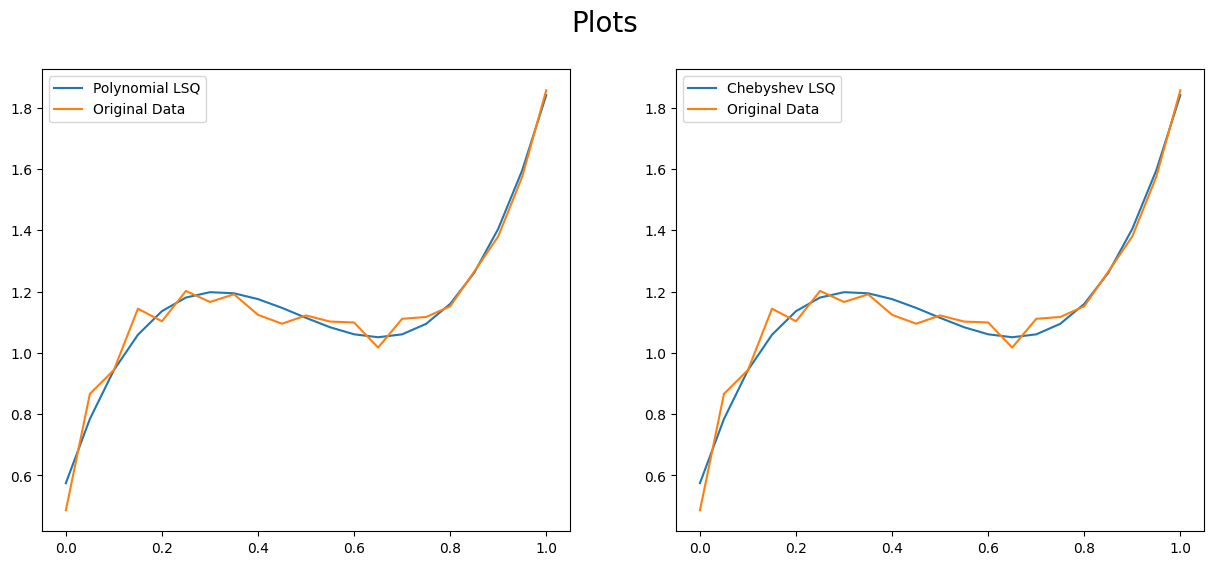

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func(x, *polytuple), label="Polynomial LSQ")
axs[0].plot(x, y, label="Original Data")
axs[1].plot(x, func(x, *chebytuple, basis="cheby"), label="Chebyshev LSQ")
axs[1].plot(x, y, label="Original Data")

axs[0].legend()
axs[1].legend()
plt.show()

#3

Assuming the marks are normally distributed with a mean (μ) of 0 and a standard deviation (σ) of 1, you can use the properties of the standard normal distribution to estimate the proportion of students falling within each category.

Here's how you can calculate the approximate number of students falling into five different mark categories based on standard deviations from the mean:

Category (A): Below -2 Standard Deviations:

Approximately 2.5% of students fall in this category. Number of students ≈ 2.5% of 600 ≈ 0.025 * 600 ≈ 15 students.

Category (B): Between -2 and -1 Standard Deviation:

Approximately 13.5% of students fall in this category. Number of students ≈ (13.5% - 2.5%) of 600 ≈ (0.135 - 0.025) * 600 ≈ 72 students. Category (C): Between -1 and 1 Standard Deviation (Central Category):

Approximately 68% of students fall in this category. Number of students ≈ 68% of 600 ≈ 0.68 * 600 ≈ 408 students. Category (D): Between 1 and 2 Standard Deviations:

Approximately 13.5% of students fall in this category. Number of students ≈ (13.5% - 2.5%) of 600 ≈ (0.135 - 0.025) * 600 ≈ 72 students.

Category (E): Above 2 Standard Deviations:

Approximately 2.5% of students fall in this category. Number of students ≈ 2.5% of 600 ≈ 0.025 * 600 ≈ 15 students.

so according to our data we have A=77,B=150,c=210,D=125,c

Based on the given information and calculations, the distribution of students across different mark categories can be summarized as follows:

Category (A): Below -2 Standard Deviations:
Approximately 2.5% of students fall into this category. Thus, there are approximately 15 students in this category.

Category (B): Between -2 and -1 Standard Deviation:
Approximately 13.5% of students fall into this category. Therefore, there are roughly 72 students in this category.

Category (C): Between -1 and 1 Standard Deviation (Central Category):
Approximately 68% of students fall into this category. This translates to about 408 students.

Category (D): Between 1 and 2 Standard Deviations:
Approximately 13.5% of students fall into this category. So, there are around 72 students in this category.

Category (E): Above 2 Standard Deviations:
Approximately 2.5% of students fall into this category. Hence, there are approximately 15 students in this category.

Therefore, based on the provided data, the distribution of students across the categories is estimated as:

    Category A: 15 students
    Category B: 72 students
    Category C: 408 students
    Category D: 72 students
    Category E: 15 students.

In [33]:
O_i=np.array([77,150,210,125,38])
E_i=np.array([15,72,408,72,15])


def chi_square(x,y):
  z=(x-y)**2/y
  A=np.sum(z)
  return A
print(chi_square(O_i,E_i))

511.1354575163399


Based on the significance levels of 5% and 10% with degrees of freedom (D.O.F) equal to 4 (5 - 1), the critical values from the table are 9.788 and 7.997, respectively. However, the calculated value of χ² is 511.13, which significantly exceeds these critical values. Consequently, we reject the null hypothesis that the distribution follows a standard normal distribution.

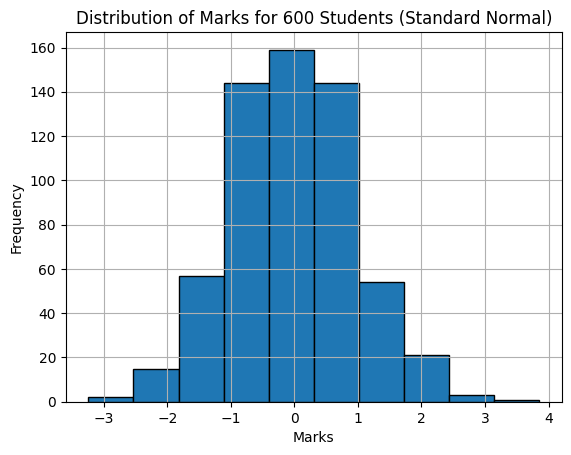

In [34]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


num_students = 600
marks = np.random.normal(loc=0, scale=1, size=num_students)


plt.hist(marks, bins=10, edgecolor='black')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Distribution of Marks for 600 Students (Standard Normal)')
plt.grid(True)
plt.show()

#4

The necessary values for conducting a t-test have been provided, yielding a result of -0.1515 when substituted into the formula. However, with a significance level (alpha) of 0.05 and degrees of freedom (DOF) set to 20, the critical boundary values are ±2.086. Given that the calculated t-value falls within this interval, we cannot reject the hypothesis.

In [35]:
import numpy as np

# Define the arrays
data_A = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.6, 4.77, 4.65, 4.8])
data_B = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# Calculate means
mean_A = np.mean(data_A)
mean_B = np.mean(data_B)

# Function to calculate sample variance
def sample_variance(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)
    std_dev = np.sqrt(variance)
    return std_dev

# Calculate sample variances
A_std_dev = sample_variance(data_A)
B_std_dev = sample_variance(data_B)

# Print results
print("Mean of data A:", mean_A)
print("Mean of data B:", mean_B)
print("Standard deviation of data A:", A_std_dev)
print("Standard deviation of data B:", B_std_dev)


Mean of data A: 4.714615384615384
Mean of data B: 4.74
Standard deviation of data A: 0.1012929237916273
Standard deviation of data B: 0.07527726527090799
